/home/ec2-user/.local/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/home/ec2-user/.local/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 9 rows containing missing values.


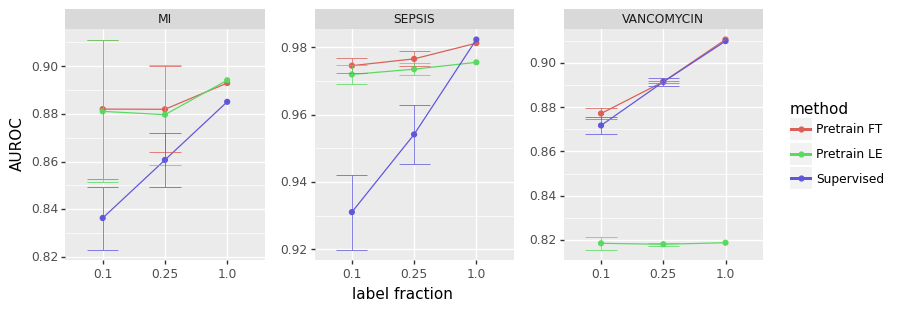

<ggplot: (8741920707268)>

In [61]:
from plotnine import *
import pandas as pd
import os

ROOT = "/home/ec2-user/biods220/project/assign2/src/output"

pretrain_target = {'forward': 2, 'trend': 1, 'dropout': 0.3, 'features': 'all'}
pretrain_df = pd.read_csv(os.path.join(ROOT, str(pretrain_target) + '_results.csv')).drop(columns=['Unnamed: 0', 'pretrain'])

ft_pretrain_df = pretrain_df.drop(columns='le_auroc').rename(columns={'ft_auroc': 'auroc'})
ft_pretrain_df['method'] = 'Pretrain FT'
le_pretrain_df = pretrain_df.drop(columns='ft_auroc').rename(columns={'le_auroc': 'auroc'})
le_pretrain_df['method'] = 'Pretrain LE'

supervised_target = {'forward': 0, 'trend': 0, 'dropout': 0.0, 'features': 'all'}
supervised_df = pd.read_csv(os.path.join(ROOT, str(supervised_target) + '_results.csv')).drop(columns=['Unnamed: 0', 'pretrain'])
supervised_df = supervised_df.drop(columns='le_auroc').rename(columns={'ft_auroc': 'auroc'})
supervised_df['method'] = 'Supervised'

df = pd.concat([ft_pretrain_df, le_pretrain_df, supervised_df])
df['auroc'] = pd.to_numeric(df['auroc'], errors = 'coerce')
df['label fraction'] = df['label fraction'].astype('category')
df = df.groupby(['condition', 'label fraction', 'method'])['auroc'].agg(['mean', 'std']).reset_index()

g_plot = (
    ggplot(aes(x = 'label fraction', y = 'mean', colour = 'method', group = 'method'))
    + geom_point(df)
    + geom_line(df)
    + geom_errorbar(df, aes(ymin = 'mean - std', ymax = 'mean + std'), size=0.3)
    + scale_y_continuous(name = 'AUROC')
    + facet_wrap(' ~ condition', scales = 'free')
     + theme(figure_size=(9, 3), panel_spacing_x = 0.5)  # here you define the plot size
)
g_plot

In [62]:
import pandas as pd
import glob
import os

ROOT = "/home/ec2-user/biods220/project/assign2/src/output/*.csv"

df_chunks = []
for path in glob.glob(ROOT):
    params = eval(path[path.index('{'): path.index('}')+1])
    chunk = pd.read_csv(path)
    for key, val in params.items():
        chunk[key] = val
    df_chunks.append(chunk)
df = pd.concat(df_chunks).drop(columns=['Unnamed: 0', 'features'])
df = df.groupby(['dropout', 'forward', 'trend', 'condition', 'label fraction'])[['le_auroc', 'ft_auroc']].agg(['mean', 'std']).reset_index()

with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(df[(df['forward']==2) & (df['dropout']==0.3) & (df['trend']==0)].set_index(['trend', 'forward']))

dropout   condition label fraction  le_auroc            \
                                                      mean       std   
trend forward                                                          
0     2           0.3          MI           0.10  0.678827  0.057368   
      2           0.3          MI           0.25  0.846923  0.006371   
      2           0.3          MI           1.00  0.868856       NaN   
      2           0.3      SEPSIS           0.10  0.866192  0.021796   
      2           0.3      SEPSIS           0.25  0.947103  0.002303   
      2           0.3      SEPSIS           1.00  0.957989       NaN   
      2           0.3  VANCOMYCIN           0.10  0.689486  0.000803   
      2           0.3  VANCOMYCIN           0.25  0.692388  0.001920   
      2           0.3  VANCOMYCIN           1.00  0.691703       NaN   

               ft_auroc            
                   mean       std  
trend forward                      
0     2        0.720163  0.040420  
      2        0.870839  0.022210  
      2        0.896452       NaN  
      2        0.930232  0.005398  
      2        0.964850  0.005153  
      2        0.982655       NaN  
      2        0.869548  0.005030  
      2        0.886561  0.003465  
      2        0.906379       NaN

In [58]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(df[(df['dropout']==0.0) & (df['forward']==0)].set_index(['trend', 'forward']))

dropout   condition label fraction  le_auroc            \
                                                      mean       std   
trend forward                                                          
0     2           0.0          MI           0.10  0.778082  0.018696   
      2           0.0          MI           0.25  0.805745  0.039440   
      2           0.0          MI           1.00  0.810748       NaN   
      2           0.0      SEPSIS           0.10  0.856976  0.014734   
      2           0.0      SEPSIS           0.25  0.925166  0.008313   
      2           0.0      SEPSIS           1.00  0.932303       NaN   
      2           0.0  VANCOMYCIN           0.10  0.832362  0.005130   
      2           0.0  VANCOMYCIN           0.25  0.828485  0.009466   
      2           0.0  VANCOMYCIN           1.00  0.834812       NaN   

               ft_auroc            
                   mean       std  
trend forward                      
0     2        0.838824  0.001306  
      2        0.851567  0.013023  
      2        0.890813       NaN  
      2        0.927463  0.006902  
      2        0.959571  0.010781  
      2        0.979346       NaN  
      2        0.872496  0.001040  
      2        0.891653  0.001987  
      2        0.909275       NaN